In [2]:
import pandas as pd
import numpy as np

In [3]:
import time
from datetime import date

In [4]:
date.today()

datetime.date(2021, 10, 21)

In [5]:
time.localtime()

time.struct_time(tm_year=2021, tm_mon=10, tm_mday=21, tm_hour=9, tm_min=55, tm_sec=58, tm_wday=3, tm_yday=294, tm_isdst=1)

In [6]:
!ls

Healthcare               air_quality_no2_long.csv date_time_class.ipynb


In [7]:
cd ..

/Users/polferrandis/Documents/class_activities


In [8]:
!ls

Week1 Week2 Week3 Week4 Week5 Week6 Week7 Week8 Week9


In [9]:
df=pd.read_csv('Week1/air_quality_no2_long.csv')

In [10]:
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [12]:
df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [13]:
df['date.utc']=pd.to_datetime(df['date.utc'],errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [15]:
df['date.utc'][1000].month

5

In [16]:
df['date.utc'][1000].year

2019

In [17]:
df['date.utc'][1000]

Timestamp('2019-05-07 04:00:00+0000', tz='UTC')

In [18]:
df['date.utc'][1000].week

19

## create weekday column

In [19]:
df['month']=pd.DatetimeIndex(df['date.utc']).month

In [20]:
df['weekday']=pd.DatetimeIndex(df['date.utc']).weekday

In [21]:
df['weekday']=df['date.utc'].dt.strftime('%a')

In [22]:
df.head()

,city,country,date.utc,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,Fri
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,Thu
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,Thu
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,Thu
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,Thu


In [23]:
df.groupby(df['month'])['value'].mean()

month
5    27.806768
6    23.872167
Name: value, dtype: float64

In [24]:
df['date.utc'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [26]:
df['date.utc'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [28]:
df['date.utc'].max()-df['date.utc'].min()

Timedelta('44 days 23:00:00')

In [33]:
df.groupby(df['date.utc'].dt.hour)['value'].mean()

date.utc
0     27.955294
1     26.125688
2     23.558511
3     23.242683
4     22.979518
5     27.070732
6     30.635632
7     31.346591
8     29.138636
9     26.071591
10    22.602326
11    21.275294
12    21.029762
13    21.008235
14    21.737647
15    23.840000
16    24.972619
17    26.691667
18    27.089412
19    28.143529
20    29.372941
21    30.973256
22    32.451282
23    31.189412
Name: value, dtype: float64

In [35]:
df['hourofday']=pd.DatetimeIndex(df['date.utc']).hour

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
 7   month      2068 non-null   int64              
 8   weekday    2068 non-null   object             
 9   hourofday  2068 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 161.7+ KB


### group by city, weekday, hour of day - mean value

In [57]:
grouped=df.groupby(['city','weekday','hourofday']).agg({'value':'mean'})
# agg to set column value and header of df

In [58]:
grouped.head()

value
city      weekday hourofday           
Antwerpen Fri     1          31.333333
                  2          11.500000
                  9          36.500000
          Mon     0          26.000000
                  1          20.500000

In [60]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 393 entries, ('Antwerpen', 'Fri', 1) to ('Paris', 'Wed', 23)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   393 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [65]:
pivoted=pd.pivot_table(grouped,values='value',index=['weekday','hourofday'],columns='city')

In [53]:
#heatmaps 

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='city', ylabel='weekday-hourofday'>

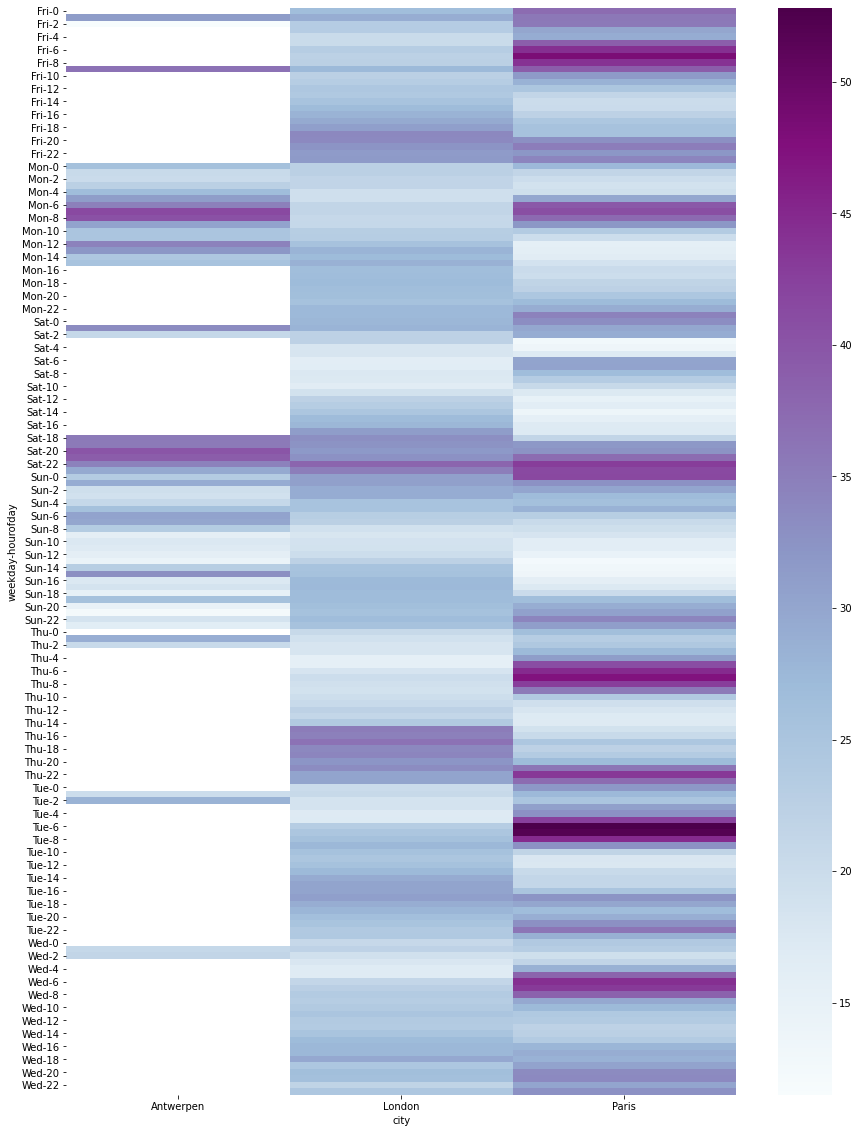

In [70]:

plt.figure(figsize=((15,20)))
sns.heatmap(pivoted,cmap="BuPu")